In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_train=pd.read_csv("loan_train.csv")


In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.drop('Loan_ID', axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
##filling null values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

/var/folders/m8/1f2s8z893yvf2syxj3006scm0000gn/T/ipykernel_48163/2444878980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)


In [9]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])


In [10]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Status']
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])


In [12]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [13]:
df_train['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [14]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['Income_to_Loan_Ratio'] = df_train['TotalIncome'] / (df_train['LoanAmount'] + 1)

(-1.0999998667238686,
 1.0999995329214522,
 -1.099999345631334,
 1.0999999688395874)

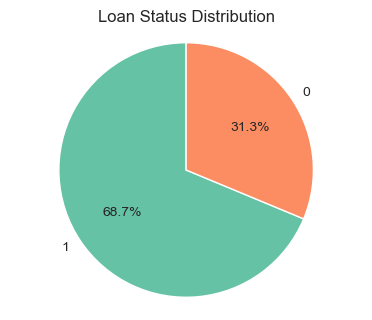

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# 1. Target Analysis: Loan_Status Distribution
plt.subplot(2, 2, 1)
loan_status_counts = df_train['Loan_Status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', 
        colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('Loan Status Distribution')
plt.axis('equal')

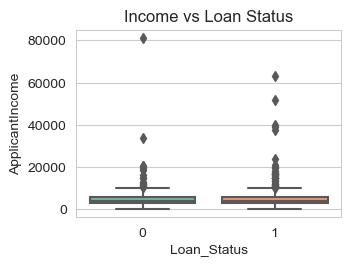

In [16]:

# Ensure df_train is defined and contains your data
plt.subplot(2, 2, 4)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_train, palette=['#66c2a5', '#fc8d62'])
plt.title('Income vs Loan Status')
plt.tight_layout()
plt.show()


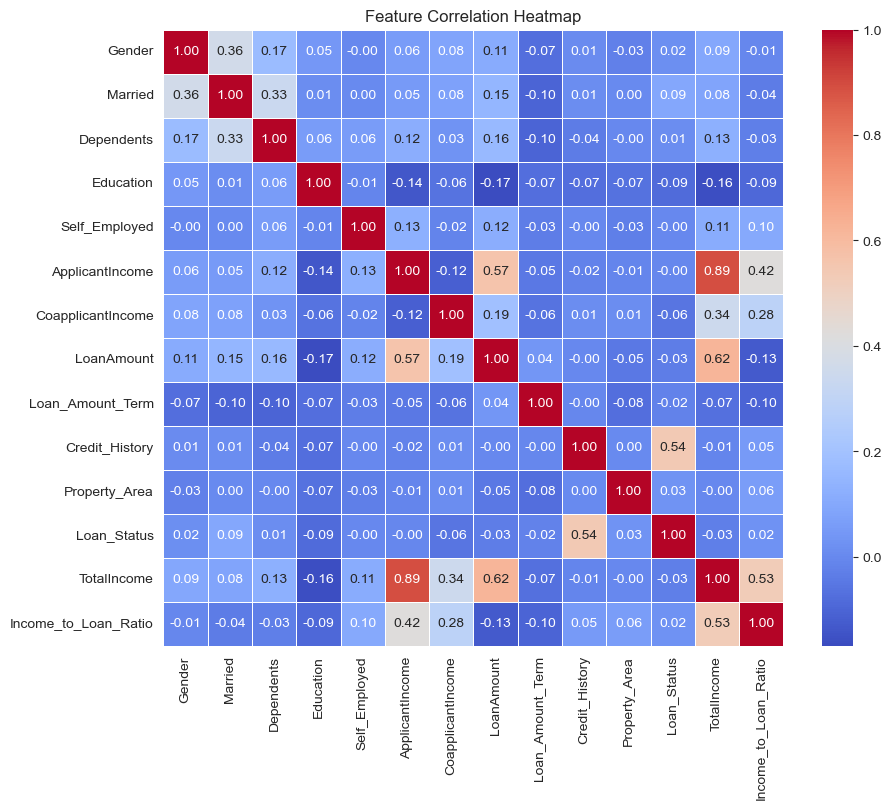

In [17]:
# 4. Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
X = df_train.drop(['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome','Loan_ID'], axis=1)
y = df_train['Loan_Status']


In [35]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]  # probability of positive class


In [21]:
!pip install xgboost

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} accuracy: {score:.3f}")


LogisticRegression accuracy: 0.758
RandomForest accuracy: 0.790
GradientBoosting accuracy: 0.790
XGBoost accuracy: 0.742


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:02:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7903225806451613
Precision: 0.7692307692307693
Recall: 0.975609756097561
F1 score: 0.8602150537634409
ROC AUC: 0.7340301974448316

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.43      0.58        21
           1       0.77      0.98      0.86        41

    accuracy                           0.79        62
   macro avg       0.83      0.70      0.72        62
weighted avg       0.81      0.79      0.77        62



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8127015860322537


In [40]:
best_model = grid.best_estimator_

In [41]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]


In [42]:
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"F1-score:      {f1:.4f}")


📊 Evaluation Metrics:
ROC-AUC Score: 0.8693
Precision:     0.8039
Recall:        1.0000
F1-score:      0.8913


In [43]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns


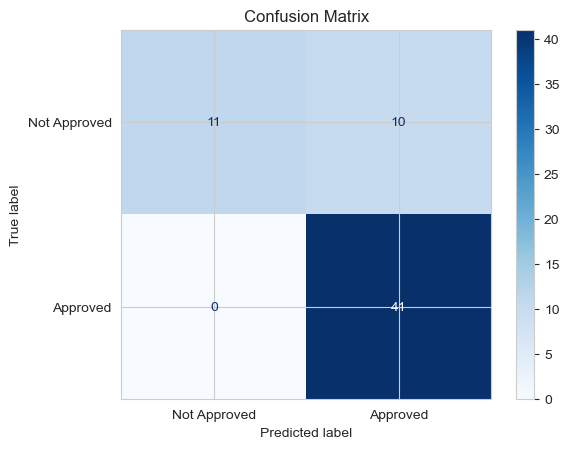

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved']))



 Classification Report:
               precision    recall  f1-score   support

Not Approved       1.00      0.52      0.69        21
    Approved       0.80      1.00      0.89        41

    accuracy                           0.84        62
   macro avg       0.90      0.76      0.79        62
weighted avg       0.87      0.84      0.82        62



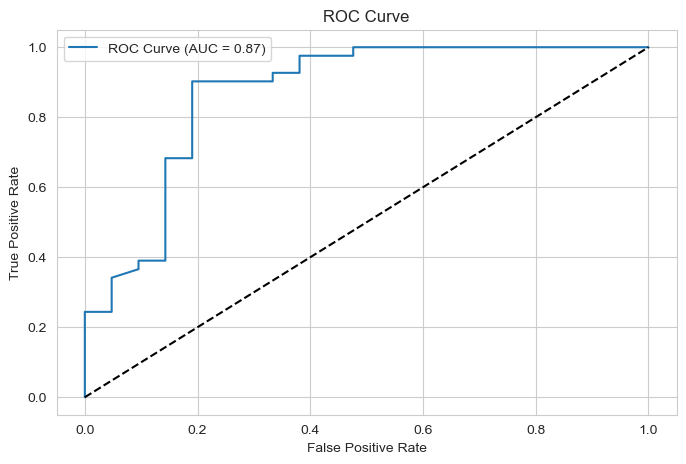

In [46]:
# ------------------- ROC Curve -------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import joblib

In [48]:
# ------------------- Save Model -------------------
joblib.dump(best_model, 'best_random_forest_model.pkl')
print(" Model saved as 'best_random_forest_model.pkl'")

 Model saved as 'best_random_forest_model.pkl'
